<a href="https://colab.research.google.com/github/VitaT/ML-python/blob/main/11_26_classification_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

Supervised methods, where we want to predict categorical value.

In [ ]:
import matplotlib.pyplot as plt   # visualization
import seaborn as sns             # visualization
import numpy as np                # data manipulation
import pandas as pd               # data manipulation, data processing, CSV file I/O (e.g. pd.read_csv
from sklearn import datasets, metrics, pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut, cross_val_score, cross_validate, GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score, cross_validate 

# Load data
data =  datasets.load_iris()
features = data.data
target = data.target
sp_names = list(data.target_names)
feature_names = list(data.feature_names)
iris = pd.DataFrame(features)
iris["Species"] = target

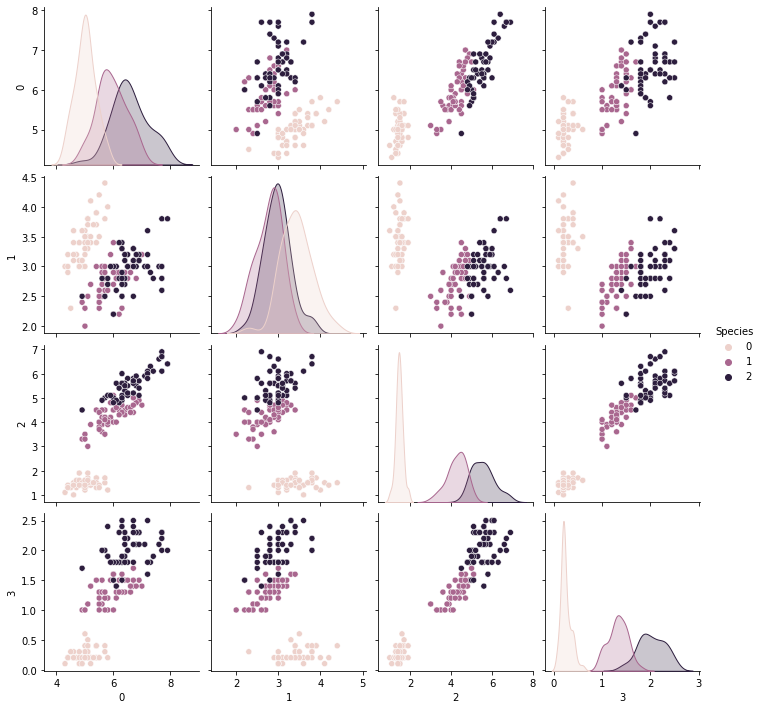

In [ ]:
# quick visualization plot
sns.pairplot(iris, hue="Species")

In [ ]:
# Data preparatation. 
# Create standardizer and standardize features
features_standardized = StandardScaler().fit_transform(features)
# use train and test split
x, x_out, y, y_out = train_test_split(features_standardized, target, test_size = 0.1, random_state = 0)  # for multiple category clasification
x2, x2_out, y2, y2_out = train_test_split(features_standardized[:100,], target[:100], test_size = 0.1, random_state = 0)  # for binary clasification

## Logistic regression

logistic regression is actually a widely used binary classifier (i.e., the target vector can only take two values).    
In a logistic regression, a linear model (e.g., $β_{0} + β_{1}x$) is included in a logistic (also called sigmoid) function
$$p(X) = \frac{e^{β_{0}+β_{1}X}}{1 + e^{β_{0}+β_{1}X}} $$
(this is an example for univariate logistic regression i.e. we have only one X predictor)


This function transforms the predictions to fit between 0 and 1 values, therefore we can interpret the values as probabilities. Usually if $p(X)$ is
greater than 0.5, class 1 is predicted; otherwise, class 0 is predicted. However, the probability threshold for different class can be adjusted by our preferences.
![](https://i.stack.imgur.com/rhVmk.jpg)

Coeficients are estimated using maximum likelihood method.

The basic intuition behind using maximum likelihood to fit a logistic regression model is as follows: we seek estimates for $β_{0}$ and
$β_{1}$ such that the predicted probability $\hat{p}(x_{i})$ of default for each individual, corresponds as closely as possible to the individual’s observed
default status. 

This intuition can be formalized using a mathematical equation called a likelihood function:

$$l(β_{0}, β_{1}) = \prod_{i:y_{i}=1}p(x_{i})\prod_{{i'}:y_{i'}=0}(1 − p(x_{i'}))$$

In [ ]:
# Create logistic regression object
log_regr = LogisticRegression(random_state=0)
# Train model
cv_log_reg = cross_validate(log_regr, x2, y2, cv=10, error_score="accuracy", return_train_score=True)

for key in ["test_score", "train_score"]:
  print(key)
  print("Accuracy: %0.2f (+/- %0.2f)" % (cv_log_reg.get(key).mean(), cv_log_reg.get(key).std() * 2))
# 2 SD is roughly 95 % of data.

log_regr.fit(x2, y2) # train

# about model
log_regr.classes_
log_regr.coef_
log_regr.intercept_

log_regr.predict(x2_out)  # predictions
log_regr.predict_proba(x2_out) # prediction probabilities

pred_out = log_regr.predict(x2_out)
pred_train = log_regr.predict(x2)

print('The accuracy of the Logistic Regression is', metrics.accuracy_score(log_regr.predict(x2_out), y2_out))


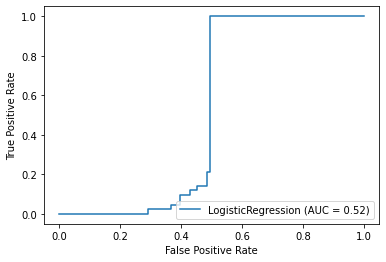

In [ ]:
# probability threshold
metrics.plot_roc_curve(log_regr, x, y)

**ROC curve** -- receiver operating characteristic curve (the method was originally developed for operators of military radar receivers, which is why it is so named).

It is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. 

**Binary classifier possible outcomes**


<img src="https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png" alt="Drawing" width="400"/>

ROC -- we have:
* y: True Positive Rate. $TPR=\frac{TP}{all\ positive}$
* x: True Negative Rate. $TNR=\frac{TN}{all\ negative}$


![](https://ml8ygptwlcsq.i.optimole.com/fMKjlhs.f8AX~1c8f3/w:768/h:378/q:auto/https://www.unite.ai/wp-content/uploads/2019/12/Preventive_Medicine-e1576294312614.png)

[more confusion matrix derived statistics](https://en.wikipedia.org/wiki/Confusion_matrix)

This shows us how our true prediction (TP and TN) and both types of errors (FP and FN) change when we increase the probability threshold by which we differenciate the classes

![](https://devopedia.org/images/article/192/2166.1566480631.png)

**ROC curve interpretation**

![](https://devopedia.org/images/article/192/7421.1566480729.jpg)


![](https://glassboxmedicine.files.wordpress.com/2019/02/roc-curve-v2.png)

**Area Under the Curve (AUC)**

AUC is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve -- an integral of ROC curve.


![](https://gblobscdn.gitbook.com/assets%2F-LvBP1svpACTB1R1x_U4%2F-LvGspxW3Zko2589SZEN%2F-LvHDdtKiSfM4WORukWK%2Fimage.png?alt=media&token=37e218e6-2fe1-4e71-8a69-bdf47bf117e0)

* AUC = 1 (or 100 %) is perfect
* AUC = 0.5 is random
* AUC < 0.5 is worse than random. We are deliberately choosing wrong answers

AUC does not distinguish if error is due to false positives or due to folse negatives

In [ ]:
metrics.confusion_matrix(pred_train, y2)
metrics.confusion_matrix(pred_out, y2_out)
# we can check what other classification metrics are there and how they relate to confussion matrix 
# https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

print(metrics.classification_report(pred_out, y2_out))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



* accuracy -- (TP + TN) / (TP + TN + FP + FN)
  * when is accuracy not a good measure?
* Precission -- TP / (TP + FP)
  + (ok) may be better if we have imbalanced datasets, because we do not code how many TP compared to TN we have. 
  + (ok) we focus very much on TP 
  - (bad) we focus very much on TP at the expense of TN. We allow for more FN
* recall -- TP / (TP + FN)
  + (ok) when we want to capture as many positives as possible
  - (bad) predict 1 (positive value) for all classes
* F1 score --  is a number between 0 and 1 and is the harmonic mean of precision and recall.
  + (ok) we want to have a model with both good precision and recall (we enforce a trade-off for precission and recall)
  - (somewhat bad) gives equal weight to precision and recall

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/9c94f59b68f5ae0dc92185906c7ec4214fd04e1e)

* fbeta_scor -- F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0


* cohen_kappa_score -- comes from statistics

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d45fc75d4d1a8d672083492fd147f75e8ba374bd)

where, $p_{o}$ is the relative observed agreement among raters (identical to accuracy) and $p_{e}$ is the hypothetical probability of chance agreement, using the observed data to calculate the probabilities of each observer randomly seeing each category.
* jaccard_score -- measures the similarity of two sets

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eaef5aa86949f49e7dc6b9c8c3dd8b233332c9e7)

![](https://miro.medium.com/max/744/1*XiLRKr_Bo-VdgqVI-SvSQg.png)

* balanced accuracy -- The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.

* log_loss -- measures the performance of a classification model whose output is a probability value between 0 and 1

$-{(y\log(p) + (1 - y)\log(1 - p))}$, where 
  * log is the natural log,
  * y - binary indicator (0 or 1) if class label c is the correct  classification for observation o
  * p - predicted probability observation o is of class c

![](https://ml-cheatsheet.readthedocs.io/en/latest/_images/cross_entropy.png)

As the predicted probability approaches 1, log loss slowly decreases. As the predicted probability decreases, however, the log loss increases rapidly. Log loss penalizes both types of errors, but especially those predictions that are confident and wrong!

* Brier score LOSS -- proposed by Glenn W. Brier in 1950. Across all items in a set N predictions, the Brier score measures the mean squared difference between the predicted probability assigned to the possible outcomes for item i, and the actual outcome

* other...

> NOTE: Machines learn by the means of a loss function. Loss function helps us to evaluate how well specific algorithm and parameters models the given data. If predictions deviates too much from actual results, loss function gives large numbers. Gradually, with the help of some optimization function (maximize or minimize), loss function learns to reduce the error in prediction. E.g. MSE (mean squared error) or MAE (mean absolute error) are loss functions.


**Reducing Variance Through Regularization**

we can also use regularization with logistic regression, similar as with linear regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import l1_min_c

# Create logistic regression object that chooses best C value with CV
log_regr_l2 = LogisticRegressionCV(penalty='l2', Cs=1000, random_state=0, cv=10, scoring="f1")
# what penalty is L2? lasso or ridge?
# Cs is the regularization strength hyperparameter C. It is a common method of to use C instead of α where C is the inverse of the regularization strength: C = 1/α
# Cs can be a list or an integer. If it's an integer -- a list of that many candidate values drawn from a logarithmic scale between –10,000 and 10,000 will be generated

# Train model
log_regr_l2.fit(x2, y2)

# model parameters
log_regr_l2.classes_
log_regr_l2.intercept_
log_regr_l2.coef_
log_regr_l2.Cs_
log_regr_l2.C_   # Array of C that maps to the best scores across every class
log_regr_l2.scores_

log_regr_l2.get_params()

# What happens to coeficients if alpha is 0? is 1?
# different C
coef_list = []
for i in [1000, 1, 0.01, 0.0001]:
  print("C = " + str(i))
  log_regr_l2 = LogisticRegression(penalty='l2', C=i, random_state=0)
  log_regr_l2.fit(x2, y2)
  print(log_regr_l2.coef_)
# smaller C values means stronger regularization
# if C is big; then alpha -> 0; and regularization is weak


C = 1000
[[ 2.57096336 -2.68982125  5.65560907  5.39650536]]
C = 1
[[ 1.02731751 -1.19401677  1.69023798  1.57468077]]
C = 0.01
[[ 0.17091668 -0.22527827  0.2459298   0.22417717]]
C = 0.0001
[[ 0.0024764  -0.00340916  0.00353216  0.00320714]]


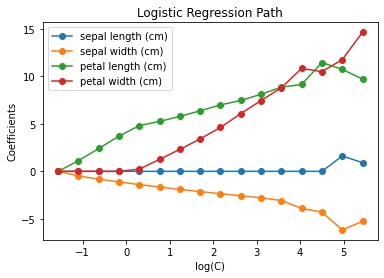

In [ ]:
# logistic regression with l1 regularization (lasso) paths
cs = l1_min_c(x2, y2, loss='log') * np.logspace(0, 7, 16)  # generating possible c values

log_regr_l2 = LogisticRegression(penalty='l1', solver="liblinear", tol=1e-6, max_iter=int(1e6))
coefs_ = []
for c in cs:
    log_regr_l2.set_params(C=c)
    log_regr_l2.fit(x2, y2)
    coefs_.append(log_regr_l2.coef_.ravel().copy())

coefs_ = np.array(coefs_)
plt.plot(np.log10(cs), coefs_, marker='o')
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.legend(labels = feature_names)


In [ ]:
# if our classes are imbalanced: class_weight = "balance"
log_r = LogisticRegression(penalty="none", random_state=0, class_weight="balance")
log_r.fit(x2, y2)

log_r.get_params()
log_r.coef_

pred_y2_train = log_r.predict(x2)
print("training error with no penalty: ", metrics.f1_score(pred_y2_train, y2))
pred_y2_out = log_r.predict(x2_out)
print("testing error with no penalty: ", metrics.f1_score(pred_y2_out, y2_out))


testing error with no penalty:  1.0


## KNN classifier

We can express KNN classifier formula with expression:

$$\hat{f}(x_{0}) = \frac{1}{K}\sum_{x_{i}\in N_{0}}I(y_{i} = j)$$

And visualize it like this:

![](https://miro.medium.com/max/405/1*0Pqqx6wGDfFm_7GLebg2Hw.png)

In [ ]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
# Create a pipeline
pipe = pipeline.Pipeline([("knn", knn)])
# Create space of candidate values
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# use GridSearchCV to conduct ten-fold cross-validation on KNN classifiers with different values of k
classifier = GridSearchCV(pipe, search_space, cv=10, scoring="accuracy", ).fit(x, y)

# Best neighborhood size (k)
classifier.best_estimator_
classifier.best_estimator_.get_params()["knn__n_neighbors"]

knn_best = classifier.best_estimator_
# training accuracy
pred = knn_best.predict(x)
metrics.accuracy_score(pred, y)

# training and test accuracy with cross validation
res = cross_validate(knn_best, x, y, cv=10, scoring="accuracy", return_train_score=True)
for key in ["test_score", "train_score"]:
  print(key)
  print("Accuracy: %0.2f (+/- %0.2f)" % (res.get(key).mean(), res.get(key).std() * 2))
# 2 SD is roughly 95 % of data.

{'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                      weights='uniform'),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 6,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': None,
 'steps': [('knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                        weights='uniform'))],
 'verbose': False}

In [ ]:
# Create an observation
new_observations = [[ 0.65, 0.65, 0.65, 0.65], [ 1, 1, 1, 1]]

# predict new obsercations
knn_best.predict(new_observations)
# show prediction probabilities
knn_best.predict_proba(new_observations)
# find the nearest neighbors of a point
knn_best = KNeighborsClassifier(n_neighbors=6).fit(x, y)
knn_nearX = knn_best.kneighbors(new_observations, return_distance=True)
knn_nearX
id = knn_nearX[1][0]  # first new point neighbors
y[id]
y[knn_nearX[1][1]]  # second point

array([2, 2, 2, 2, 2, 2])

Additional resources:
* https://www.youtube.com/watch?v=4jRBRDbJemM
* https://www.youtube.com/watch?v=NGf0voTMlcs&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=20 (and others from the playlist)